In [7]:
import requests

TAGS_URL = 'https://gist.githubusercontent.com/karpitony/bd3870f51597b9e047e9656e5acaff07/raw/6f0502db6e8e4d872474218b9a26b775f9060975/tags.txt'

In [18]:
def get_tags(url):
  try:
    response = requests.get(url)
    response.raise_for_status()
    return response.text

  except requests.exceptions.RequestException as e:
    return f"Error occurred: {e}"

In [21]:
tags = list(get_tags(TAGS_URL).split('\n'))

In [23]:
len(tags), tags[0]

(172, '수학')

In [26]:
# 유니코드 상에서 한글 초성, 중성, 종성의 시작 위치
CHOSUNG_START = 0x1100
JUNGSUNG_START = 0x1161
JONGSUNG_START = 0x11A7

# 유니코드 한글 음절의 시작 위치와 음절 범위
HANGUL_START = 0xAC00
HANGUL_END = 0xD7A3

# 초성, 중성, 종성 리스트
CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
JONGSUNG_LIST = [' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def decompose_hangul_to_string(text):
  result = []

  for char in text:
    # 한글 음절 범위 내의 문자일 경우에만 분리 진행
    if HANGUL_START <= ord(char) <= HANGUL_END:
      # 유니코드 상에서 해당 문자의 음절 번호 계산
      syllable_index = ord(char) - HANGUL_START

      # 초성, 중성, 종성 분리
      chosung_index = syllable_index // (21 * 28)
      jungsung_index = (syllable_index % (21 * 28)) // 28
      jongsung_index = syllable_index % 28

      # 초성, 중성, 종성 결과에 추가
      result.append(CHOSUNG_LIST[chosung_index])
      result.append(JUNGSUNG_LIST[jungsung_index])
      if jongsung_index != 0:  # 종성이 있을 경우에만 추가
          result.append(JONGSUNG_LIST[jongsung_index])
    else:
      # 한글이 아니면 그대로 결과에 추가
      result.append(char)

  return ''.join(result)

# 테스트 예시
text = "안녕하세요"
decomposed_text = decompose_hangul_to_string(text)
print(decomposed_text)


ㅇㅏㄴㄴㅕㅇㅎㅏㅅㅔㅇㅛ


In [29]:
def trim_tag(tag):
  return tag.replace('-', '').replace(' ', '')

In [30]:
decom = list(map(decompose_hangul_to_string, map(trim_tag, tags)))

In [32]:
decom[0], decom[100], decom[170]

('ㅅㅜㅎㅏㄱ', 'ㅊㅚㅅㅗㄱㅗㅇㅌㅗㅇㅈㅗㅅㅏㅇ', 'ㅅㅏㅇㅅㅜㅊㅚㅈㅓㄱㅎㅘ')

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
length = np.array([*map(len, decom)])

In [38]:
length

array([ 5, 11,  8, 16, 22, 10, 18, 23, 19, 22, 15, 14, 20,  9,  9,  9, 13,
        8, 18,  9, 19, 13, 13, 11, 10, 33, 17, 18,  9,  8,  5, 12, 20, 30,
       40, 30, 48, 34, 28, 13, 25, 11, 12, 15, 16, 11, 15, 14, 10, 11, 16,
       20, 12,  9, 12, 11, 12, 15, 19,  9,  7,  8,  2, 12,  5, 12,  3, 13,
       30, 24, 20, 12, 11, 26, 26,  9,  8,  5,  9, 13,  6,  4, 16, 20,  6,
        7, 15, 12, 16, 15, 29, 11, 19, 28, 19, 12, 17, 19, 10,  4, 15,  6,
       11, 11, 19, 13, 11, 17, 15,  9, 14, 10,  7, 14, 11, 17,  7,  8, 16,
       11, 10, 12, 10,  7,  9,  9, 18, 21, 12, 10, 20, 13, 30,  4, 15, 10,
       20, 10,  5, 16, 44,  9, 17, 30, 17, 17,  8, 18, 19, 10, 12,  9, 15,
       14, 15, 16, 11, 10, 14, 10, 17,  8,  8, 14, 17, 11, 10, 11, 13, 21,
       12, 11])

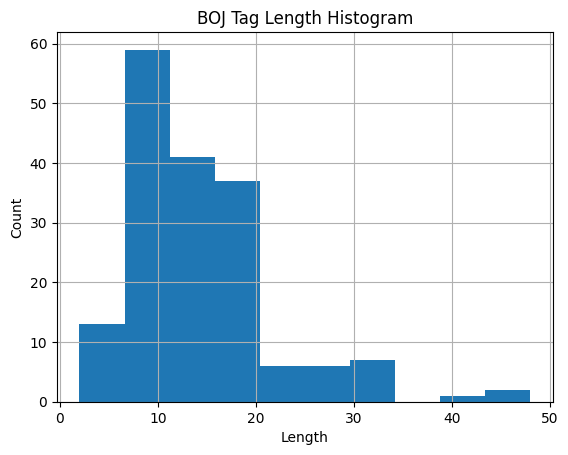

In [40]:
plt.hist(length)
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('BOJ Tag Length Histogram')
plt.grid(True)

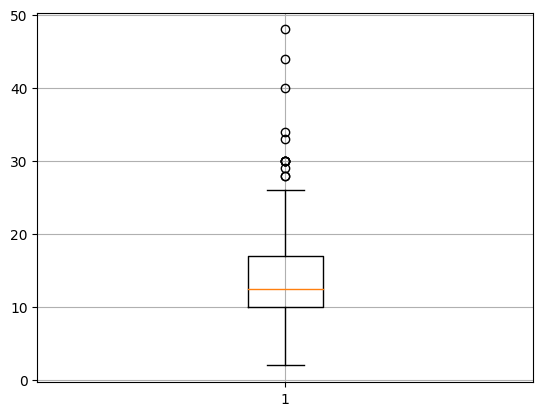

In [43]:
plt.boxplot(length)
plt.grid(True)
plt.show()

In [44]:
full_length = np.array([*map(len, tags)])
full_length

array([ 2,  4,  3,  8, 11,  5, 10, 12,  9, 11,  8,  8, 10,  5,  5,  5,  6,
        3,  9,  3,  8,  5,  7,  4,  5, 15,  9,  9,  4,  3,  2,  5, 10, 16,
       20, 14, 24, 17, 14,  7, 13,  6,  6,  8,  8,  5,  9,  7,  5,  5,  8,
        8,  6,  3,  6,  6,  7,  6, 11,  5,  3,  4,  1,  6,  2,  6,  1,  7,
       16, 13, 11,  8,  5, 13, 13,  5,  3,  2,  5,  6,  3,  2,  8, 10,  2,
        3,  8,  5,  8,  7, 15,  6,  9, 15, 10,  6,  7,  8,  5,  2,  8,  3,
        6,  6, 10,  7,  5,  8,  8,  5,  8,  5,  4,  8,  5,  8,  4,  3,  8,
        5,  4,  5,  5,  3,  5,  5, 11, 13,  5,  5, 11,  7, 14,  2,  8,  5,
       10,  5,  2,  9, 22,  4,  8, 14,  7,  8,  3,  9,  9,  5,  5,  4,  8,
        7,  7,  8,  5,  4,  6,  5,  7,  4,  3,  6,  8,  6,  5,  5,  6, 13,
        6,  5])

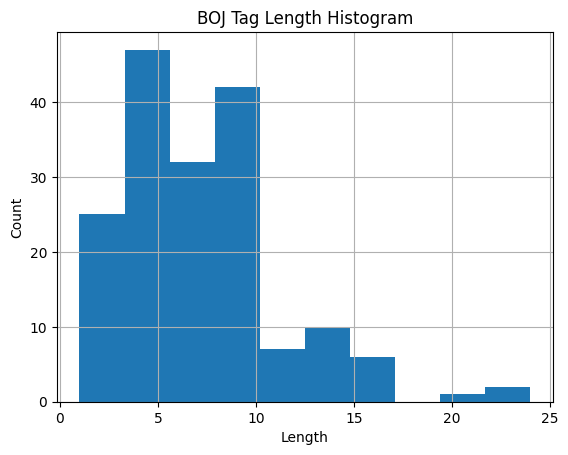

In [45]:
plt.hist(full_length)
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('BOJ Tag Length Histogram')
plt.grid(True)

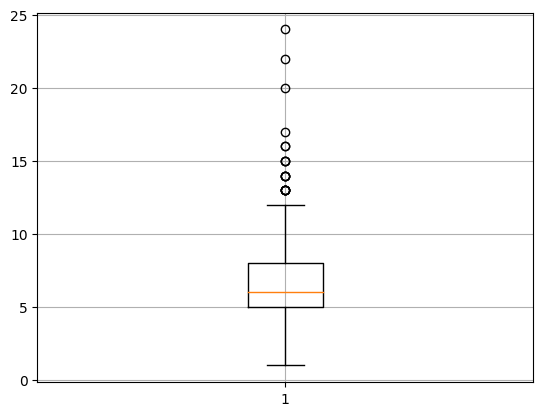

In [46]:
plt.boxplot(full_length)
plt.grid(True)
plt.show()